# **Algoritmo de Ford Fulkerson**
- Es un método general para hallar el flujo máximo en una red de flujo utilizando caminos aumentantes.
- Se basa en la idea de aumentar el flujo a los largo del los caminos encontrados mediante busqueda en profundidad DFS.

Algortimo
1. EL grafo G con las aristas f/c, donde f es flujo y c es la capacidad máxima de la arista
2. El grafo resigual G' con las aristas: <----flujos, y ---->capacidad restante
3. Seleccionar en en G', un camino aumentante cualquiera que nos lleve de s a t, pero que todas sus aristas (capacidad restante) tengan valores mayores a 0, en ese camino seleccionamos c=menor capacidad restante.
4. Actualizamos el flujo resultante (actualizamos G), al aumentar c a cada flujo <------- y disminuir c en cada capacidad restante -------> en el camino, entonces para cada arista tendremos un nuevo f/c.
5. Finalmente, obtendremos el grafo residual inducido por el grafo de flujo resultante anterior, <---------, y -------->


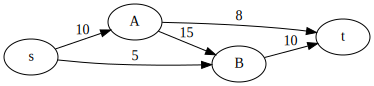

In [7]:
from graphviz import Digraph
import numpy as np
class CFordFulkerson:
  def __init__(self, lag):
    self.grafo=lag
    self.grafo_residual={}# aristas del grafo residual, dinamico, se irá actulizando
    self.flujos={} #almacena el flujo definitivo en cada arco, acumulando
    self.CreaGrafoResidual()

  def dibujaGrafo(self):
    dibujo=Digraph()
    dibujo.graph_attr['rankdir']='LR'

    for nodo in self.grafo.keys():
      dibujo.node(nodo)

    for nodo, lista in self.grafo.items():
      for vecino, peso in lista:
        dibujo.edge(nodo,vecino, label=str(peso))
    return dibujo

  #El grafo de flujos (final) viene en el siguiente formato
  #{('s', 'A'): 10, ('A','t'):45}

  def dibujaFlujo(self):
    dibujo=Digraph()
    dibujo.graph_attr['rankdir']='LR'

    for aristas, peso in self.flujos.items():
      if peso>0:
        dibujo.edge(aristas[0],aristas[1], label=str(peso))
    return dibujo

  def CreaGrafoResidual(self):
    for nodo in self.grafo:
      if nodo not in self.grafo_residual:
        self.grafo_residual[nodo]={}

      for vecino, peso in self.grafo[nodo]:
        if vecino not in self.grafo_residual:
          self.grafo_residual[vecino]={}

        self.grafo_residual[nodo][vecino]=peso #actualuzando el peso de la arista nodo, vecino

        if vecino not in self.grafo_residual or nodo not in self.grafo_residual[vecino]:
          self.grafo_residual[vecino][nodo]=0

        if (nodo, vecino) not in self.flujos:
          self.flujos[(nodo, vecino)]=0

        if (vecino, nodo) not in self.flujos:
          self.flujos[(vecino, nodo)]=0

  #Buscamos el camino aumentante con DFS
  #En el camino aumentante no existe arista con capacidad residual 0
  def DFS(self,fuente, sumidero, camino, visitados):
    if fuente==sumidero:
      return camino
    visitados.add(fuente)

    for vecino, capacidad in self.grafo_residual[fuente].items():
      if vecino not in visitados and capacidad>0:
        nuevo_camino=self.DFS(vecino, sumidero, camino+[(fuente, vecino)], visitados)
        if nuevo_camino:
          return nuevo_camino
    return None

  def FordFulkerson(self, fuente, sumidero):
    flujo_maximo=0
    while True:
      #recupeamos un camino aumentante
      camino=self.DFS(fuente, sumidero, [], set())
      if camino is None:
        break

      #Recuperamos la menor capacidad residual del camino
      crc=min(self.grafo_residual[nodo][vecino] for nodo, vecino in camino)


      for nodo, vecino in camino:
        #Actualizamos el grafo residual
        self.grafo_residual[nodo][vecino]-=crc
        self.grafo_residual[vecino][nodo]+=crc

        #Actualizamos el flujo
        self.flujos[(nodo, vecino)]+=crc
        self.flujos[(vecino, nodo)]-=crc
      flujo_maximo+=crc
    return flujo_maximo

#Pruebas
lag = {
    's': [('A', 10), ('B', 5)],
    'A': [('B', 15), ('t', 8)],
    'B': [('t', 10)]
}

obj=CFordFulkerson(lag)
obj.dibujaGrafo()

Flujo maximo :  15


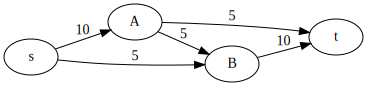

In [8]:
print("Flujo maximo : ", obj.FordFulkerson('s', 't'))
obj.dibujaFlujo()

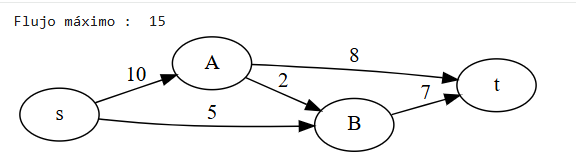

# **Algoritmo de Edmonds Karp**
- Es un método general para hallar el flujo máximo en una red de flujo utilizando caminos aumentantes.
- Se basa en la idea de aumentar el flujo a los largo del los caminos encontrados mediante busqueda en anchura BFS.

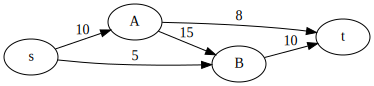

In [9]:
from graphviz import Digraph
from collections import deque

class CEdmonsKarp:
  def __init__(self, lag):
    self.grafo = lag
    self.grafo_residual={}
    self.flujos={}
    self.CreaGrafoResidual() #se usa para inicializar el grafo_residual

  def dibujaGrafo(self):
    dibujo=Digraph()
    dibujo.graph_attr['rankdir']='LR'

    for nodo in self.grafo.keys():
      dibujo.node(nodo)

    for nodo, lista in self.grafo.items():
      for vecino, peso in lista:
        dibujo.edge(nodo,vecino, label=str(peso))
    return dibujo

  #El grafo de flujos (final) viene en el siguiente formato
  #{('s', 'A'): 10, ('A','t'):45}

  def dibujaFlujo(self):
    dibujo=Digraph()
    dibujo.graph_attr['rankdir']='LR'

    for aristas, peso in self.flujos.items():
      if peso>0:
        dibujo.edge(aristas[0],aristas[1], label=str(peso))
    return dibujo

  def CreaGrafoResidual(self):
    for nodo in self.grafo:
      if nodo not in self.grafo_residual:
        self.grafo_residual[nodo]={}

      for vecino, peso in self.grafo[nodo]:
        if vecino not in self.grafo_residual:
          self.grafo_residual[vecino]={}

        self.grafo_residual[nodo][vecino]=peso #actualizando el peso de la arista nodo, vecino

        if vecino not in self.grafo_residual or nodo not in self.grafo_residual[vecino]:
          self.grafo_residual[vecino][nodo]=0

        if (nodo, vecino) not in self.flujos:
          self.flujos[(nodo, vecino)]=0

        if (vecino, nodo) not in self.flujos:
          self.flujos[(vecino, nodo)]=0

  #EL camino aumetante se halla mediante BFS
  def BFS(self, fuente, sumidero, padre):
    visitados=set()
    cola=deque([fuente])
    visitados.add(fuente)

    while cola:
      u=cola.popleft()
      for v, capacidad in self.grafo_residual[u].items():
        if v not in visitados and capacidad>0:
          padre[v]=u
          visitados.add(v)
          cola.append(v)
          if v==sumidero:
            return True
    return False

  def EdmonKarp(self, fuente, sumidero):
    flujo_maximo=0
    padre={}
    while self.BFS(fuente, sumidero, padre):
      crc=float('inf')
      s=sumidero

      while s!=fuente:
        crc=min(crc, self.grafo_residual[padre[s]][s])
        s=padre[s]
      v=sumidero

      while v!=fuente:
        u=padre[v]
        self.grafo_residual[u][v]-=crc
        self.grafo_residual[v][u]+=crc
        self.flujos[(u, v)]+=crc
        self.flujos[(v, u)]-=crc
        v=padre[v]
      flujo_maximo+=crc
    return flujo_maximo


#Pruebas
lag = {
    's': [('A', 10), ('B', 5)],
    'A': [('B', 15), ('t', 8)],
    'B': [('t', 10)]
}

obj=CEdmonsKarp(lag)
obj.dibujaGrafo()

Flujo máximo :  15


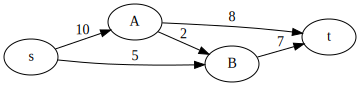

In [11]:
print("Flujo máximo : ", obj.EdmonKarp('s', 't'))
obj.dibujaFlujo()

In [ ]:
""